## Import Data


In [1]:
!pip install -r '../requirements.txt'

import nltk 

nltk.download('punkt') 
nltk.download('averaged_perceptron_tagger') 

path_to_csv = '/Users/macbookair/Documents/SEM 3/NLP/data/dataset_mentalhealth.csv'

ERROR: Could not open requirements file: [Errno 2] No such file or directory: '../requirements.txt'


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/macbookair/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/macbookair/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
import re
import random
import pandas as pd
import numpy as np
from tensorflow.keras.utils import plot_model
from keras.models import load_model
import matplotlib.pyplot as plt

pd.set_option('mode.chained_assignment', None)

In [3]:
data=pd.read_csv(path_to_csv, nrows=20)

In [4]:
data.head()

,Question_ID,Questions,Jawaban
0,1590140,Apa yang dimaksud dengan penyakit mental?,Penyakit mental adalah kondisi kesehatan yang ...
1,2110618,Siapa yang terpengaruh oleh penyakit mental?,Diperkirakan bahwa penyakit mental mempengaruh...
2,6361820,Apa penyebab penyakit mental?,Diperkirakan bahwa penyakit mental mempengaruh...
3,9434130,Apa sajakah tanda-tanda peringatan penyakit me...,Gejala gangguan kesehatan mental bervariasi te...
4,7657263,Apakah penderita penyakit jiwa bisa sembuh?,"Ketika penyembuhan dari penyakit mental, ident..."


## Data preprocessing 

In [5]:
def cleaning(text):
    text = re.sub(r'@[A-Za-a0-9]+',' ',text)
    text = re.sub(r'#[A-Za-z0-9]+',' ',text)
    text = re.sub(r"http\S+",' ',text)
    text = re.sub(r'[0-9]+',' ',text)
    text = re.sub(r"[-()\"#/@;:<>{}'+=~|.,_]", '', text)
    text = re.sub(r"(?:\@|https?\://)\S+", '', text)
    text = re.sub(r'[^\x00-\x7f]', '', text)
    text = re.sub(r'\n', ' ', text)
    text = text.strip(' ')
    text = text.lower()
    return text

data['Questions'] = data['Questions'].apply(cleaning)
data['Jawaban'] = data['Jawaban'].apply(cleaning)

In [ ]:
import nltk
nltk.download('stopwords')

import nltk
nltk.download('punkt')

import nltk
nltk.download('wordnet')

In [ ]:
import nltk
from nltk.corpus import stopwords
stopwords.words('indonesian')

def remove_stopwords(text):
    stop_words= stopwords.words('indonesian')
    
    return ' '.join(c for c in nltk.word_tokenize(text) if c not in stop_words)

In [ ]:
from nltk.stem import WordNetLemmatizer

wordnet_lemma = WordNetLemmatizer()

def lemma(text):
    lemmatize_words = [wordnet_lemma.lemmatize(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return ' '.join(lemmatize_words)

In [ ]:
data['Questions'] = data['Questions'].apply(remove_stopwords)
data['Jawaban'] = data['Jawaban'].apply(remove_stopwords)
data['Questions'] = data['Questions'].apply(lemma)
data['Jawaban'] = data['Jawaban'].apply(lemma)
data.head()

In [6]:
pasangan=[]

for i in range(data.shape[0]):
  pasangan.append(((data['Questions'][i]),data['Jawaban'][i]))

In [7]:
pasangan                               

[('apa yang dimaksud dengan penyakit mental?',
  'penyakit mental adalah kondisi kesehatan yang mengganggu pikiran emosi hubungan dan fungsi seseorang mereka dikaitkan dengan kesusahan dan berkurangnya kapasitas untuk terlibat dalam kegiatan kehidupan sehari hari yang biasa penyakit mental jatuh di sepanjang rangkaian keparahan beberapa cukup ringan dan hanya mengganggu beberapa aspek kehidupan seperti fobia tertentu di ujung lain spektrum terletak penyakit mental yang serius yang mengakibatkan gangguan fungsional utama dan gangguan dengan kehidupan sehari hari ini termasuk gangguan seperti depresi berat skizofrenia dan gangguan bipolar dan mungkin mengharuskan orang tersebut menerima perawatan di rumah sakit penting untuk mengetahui bahwa penyakit mental adalah kondisi medis yang tidak ada hubungannya dengan karakter kecerdasan atau kemauan seseorang sama seperti diabetes adalah kelainan pankreas penyakit mental adalah kondisi medis karena biologi otak demikian pula dengan bagaimana s

In [8]:
pertanyaan = []
jawaban = []
input_tokens = set()
target_tokens = set()

for line in pasangan:
  tanya, jawab = line[0], line[1]
  pertanyaan.append(tanya)

  jawab = " ".join(re.findall(r"[\w']+|[^\s\w]", jawab))
  jawab = '<START> ' + jawab + ' <END>'
  jawaban.append(jawab)

  for token in re.findall(r"[\w']+|[^\s\w]", tanya):
    if token not in input_tokens:
      input_tokens.add(token)
  for token in jawab.split():
    if token not in target_tokens:
      target_tokens.add(token)

input_tokens = sorted(list(input_tokens)) 
target_tokens = sorted(list(target_tokens))
num_encoder_tokens = len(input_tokens)
num_decoder_tokens = len(target_tokens)

In [9]:
pertanyaan

['apa yang dimaksud dengan penyakit mental?',
 'siapa yang terpengaruh oleh penyakit mental?',
 'apa penyebab penyakit mental?',
 'apa sajakah tandatanda peringatan penyakit mental?',
 'apakah penderita penyakit jiwa bisa sembuh?',
 'apa yang harus saya lakukan jika saya mengenal seseorang yang tampaknya memiliki gejala gangguan jiwa?',
 'bagaimana saya bisa menemukan ahli kesehatan mental untuk diri saya sendiri atau anak saya?',
 'pilihan pengobatan apa yang tersedia?',
 'jika saya terlibat dalam pengobatan apa yang perlu saya ketahui?',
 'apa perbedaan antara profesional kesehatan mental?',
 'bagaimana saya dapat menemukan ahli kesehatan mental yang tepat untuk anak saya atau saya sendiri?',
 'jika saya terlibat dalam pengobatan apa yang perlu saya ketahui?',
 'di mana lagi saya bisa mendapatkan bantuan?',
 'apa yang harus saya ketahui sebelum memulai pengobatan baru?',
 'jika saya merasa lebih baik setelah minum obat apakah ini berarti saya sudah sembuh dan dapat berhenti meminumny

In [10]:
jawaban

['<START> penyakit mental adalah kondisi kesehatan yang mengganggu pikiran emosi hubungan dan fungsi seseorang mereka dikaitkan dengan kesusahan dan berkurangnya kapasitas untuk terlibat dalam kegiatan kehidupan sehari hari yang biasa penyakit mental jatuh di sepanjang rangkaian keparahan beberapa cukup ringan dan hanya mengganggu beberapa aspek kehidupan seperti fobia tertentu di ujung lain spektrum terletak penyakit mental yang serius yang mengakibatkan gangguan fungsional utama dan gangguan dengan kehidupan sehari hari ini termasuk gangguan seperti depresi berat skizofrenia dan gangguan bipolar dan mungkin mengharuskan orang tersebut menerima perawatan di rumah sakit penting untuk mengetahui bahwa penyakit mental adalah kondisi medis yang tidak ada hubungannya dengan karakter kecerdasan atau kemauan seseorang sama seperti diabetes adalah kelainan pankreas penyakit mental adalah kondisi medis karena biologi otak demikian pula dengan bagaimana seseorang akan mengobati diabetes dengan 

In [11]:
input_features_dict = dict([(token, i) for i, token in enumerate(input_tokens)])
target_features_dict = dict([(token, i) for i, token in enumerate(target_tokens)])

reverse_input_features_dict = dict((i, token) for token, i in input_features_dict.items())
reverse_target_features_dict = dict((i, token) for token, i in target_features_dict.items())

In [12]:
input_features_dict

{'?': 0,
 'ahli': 1,
 'anak': 2,
 'antara': 3,
 'apa': 4,
 'apakah': 5,
 'atau': 6,
 'bagaimana': 7,
 'baik': 8,
 'bantuan': 9,
 'baru': 10,
 'berarti': 11,
 'berhenti': 12,
 'bisa': 13,
 'dalam': 14,
 'dan': 15,
 'dapat': 16,
 'dengan': 17,
 'di': 18,
 'dimaksud': 19,
 'diri': 20,
 'gangguan': 21,
 'gejala': 22,
 'harus': 23,
 'ini': 24,
 'jenisjenis': 25,
 'jika': 26,
 'jiwa': 27,
 'ke': 28,
 'kelompok': 29,
 'kesehatan': 30,
 'ketahui': 31,
 'lagi': 32,
 'lakukan': 33,
 'lebih': 34,
 'mana': 35,
 'membayar': 36,
 'memiliki': 37,
 'meminumnya': 38,
 'mempelajari': 39,
 'memulai': 40,
 'mencari': 41,
 'mendapatkan': 42,
 'menemukan': 43,
 'mengenal': 44,
 'mental': 45,
 'merasa': 46,
 'minum': 47,
 'obat': 48,
 'oleh': 49,
 'penderita': 50,
 'pendukung': 51,
 'pengobatan': 52,
 'penyakit': 53,
 'penyebab': 54,
 'perawatan': 55,
 'perbedaan': 56,
 'peringatan': 57,
 'perlu': 58,
 'pilihan': 59,
 'profesional': 60,
 'saja': 61,
 'sajakah': 62,
 'saya': 63,
 'sebelum': 64,
 'sembuh': 65,

## Vektorisasi (Encoder Decoder)

In [13]:
max_encoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", tanya)) for tanya in pertanyaan])
max_decoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", jawab)) for jawab in jawaban])

encoder_input_data = np.zeros(
    (len(pertanyaan), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(pertanyaan), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(pertanyaan), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
for line, (tanya, jawab) in enumerate(zip(pertanyaan, jawaban)):
    for timestep, token in enumerate(re.findall(r"[\w']+|[^\s\w]", tanya)):
        encoder_input_data[line, timestep, input_features_dict[token]] = 1.
    
    for timestep, token in enumerate(jawab.split()):
        decoder_input_data[line, timestep, target_features_dict[token]] = 1.
        if timestep > 0:
            decoder_target_data[line, timestep - 1, target_features_dict[token]] = 1.

In [14]:
encoder_input_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [15]:
decoder_target_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## Training Model

In [16]:
from tensorflow import keras
from keras.layers import Input, LSTM, Dense
from keras.models import Model  
dimensionality = 256 
batch_size = 10
epochs = 3000 

#Encoder
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder_lstm = LSTM(dimensionality, return_state=True)
encoder_outputs, state_hidden, state_cell = encoder_lstm(encoder_inputs)
encoder_states = [state_hidden, state_cell]

#Decoder
decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(dimensionality, return_sequences=True, return_state=True)
decoder_outputs, decoder_state_hidden, decoder_state_cell = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [17]:
training_model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 

In [18]:
training_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, 80)]           0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, None, 562)]          0         []                            
                                                                                                  
 lstm (LSTM)                 [(None, 256),                345088    ['input_1[0][0]']             
                              (None, 256),                                                        
                              (None, 256)]                                                        
                                                                                              

In [19]:
plot_model(training_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [20]:
training_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'], sample_weight_mode='temporal')#Training
history1=training_model.fit([encoder_input_data, decoder_input_data], decoder_target_data, batch_size = batch_size, epochs = epochs, validation_split = 0.2)
training_model.save('training_model.h5py')

Epoch 1/3000
2/2 [==============================] - 9s 3s/step - loss: 3.7884 - accuracy: 0.1072 - val_loss: 1.0522 - val_accuracy: 0.0093
Epoch 2/3000
2/2 [==============================] - 1s 644ms/step - loss: 3.6410 - accuracy: 0.0318 - val_loss: 0.9514 - val_accuracy: 0.0012
Epoch 3/3000
2/2 [==============================] - 1s 701ms/step - loss: 3.3661 - accuracy: 0.0280 - val_loss: 0.9299 - val_accuracy: 0.0105
Epoch 4/3000
2/2 [==============================] - 1s 762ms/step - loss: 3.3329 - accuracy: 0.0298 - val_loss: 0.9420 - val_accuracy: 0.0105
Epoch 5/3000
2/2 [==============================] - 1s 744ms/step - loss: 3.3237 - accuracy: 0.0304 - val_loss: 0.9337 - val_accuracy: 0.0105
Epoch 6/3000
2/2 [==============================] - 1s 815ms/step - loss: 3.3146 - accuracy: 0.0321 - val_loss: 0.9251 - val_accuracy: 0.0105
Epoch 7/3000
2/2 [==============================] - 1s 753ms/step - loss: 3.3091 - accuracy: 0.0315 - val_loss: 0.9386 - val_accuracy: 0.0105
Epoch 8/3

2/2 [==============================] - 2s 810ms/step - loss: 3.1292 - accuracy: 0.0388 - val_loss: 1.0402 - val_accuracy: 0.0058
Epoch 116/3000
2/2 [==============================] - 1s 651ms/step - loss: 3.1218 - accuracy: 0.0383 - val_loss: 1.0407 - val_accuracy: 0.0058
Epoch 117/3000
2/2 [==============================] - 1s 696ms/step - loss: 3.1165 - accuracy: 0.0380 - val_loss: 1.0459 - val_accuracy: 0.0082
Epoch 118/3000
2/2 [==============================] - 1s 847ms/step - loss: 3.1090 - accuracy: 0.0400 - val_loss: 1.0484 - val_accuracy: 0.0047
Epoch 119/3000
2/2 [==============================] - 1s 800ms/step - loss: 3.1376 - accuracy: 0.0374 - val_loss: 1.0496 - val_accuracy: 0.0070
Epoch 120/3000
2/2 [==============================] - 1s 613ms/step - loss: 3.1150 - accuracy: 0.0383 - val_loss: 1.0527 - val_accuracy: 0.0047
Epoch 121/3000
2/2 [==============================] - 1s 797ms/step - loss: 3.1129 - accuracy: 0.0394 - val_loss: 1.0527 - val_accuracy: 0.0093
Epoch 1

2/2 [==============================] - 1s 897ms/step - loss: 3.0448 - accuracy: 0.0464 - val_loss: 1.0952 - val_accuracy: 0.0047
Epoch 173/3000
2/2 [==============================] - 2s 922ms/step - loss: 3.0395 - accuracy: 0.0514 - val_loss: 1.0937 - val_accuracy: 0.0047
Epoch 174/3000
2/2 [==============================] - 2s 1s/step - loss: 3.0440 - accuracy: 0.0499 - val_loss: 1.0967 - val_accuracy: 0.0047
Epoch 175/3000
2/2 [==============================] - 1s 680ms/step - loss: 3.0373 - accuracy: 0.0496 - val_loss: 1.0987 - val_accuracy: 0.0047
Epoch 176/3000
2/2 [==============================] - 1s 858ms/step - loss: 3.0321 - accuracy: 0.0520 - val_loss: 1.1047 - val_accuracy: 0.0047
Epoch 177/3000
2/2 [==============================] - 1s 764ms/step - loss: 3.0351 - accuracy: 0.0508 - val_loss: 1.1018 - val_accuracy: 0.0035
Epoch 178/3000
2/2 [==============================] - 1s 662ms/step - loss: 3.0371 - accuracy: 0.0494 - val_loss: 1.0965 - val_accuracy: 0.0058
Epoch 179/

2/2 [==============================] - 1s 708ms/step - loss: 2.9592 - accuracy: 0.0622 - val_loss: 1.1310 - val_accuracy: 0.0082
Epoch 230/3000
2/2 [==============================] - 1s 703ms/step - loss: 2.9661 - accuracy: 0.0570 - val_loss: 1.1269 - val_accuracy: 0.0082
Epoch 231/3000
2/2 [==============================] - 1s 631ms/step - loss: 2.9569 - accuracy: 0.0643 - val_loss: 1.1315 - val_accuracy: 0.0047
Epoch 232/3000
2/2 [==============================] - 1s 710ms/step - loss: 2.9578 - accuracy: 0.0610 - val_loss: 1.1279 - val_accuracy: 0.0058
Epoch 233/3000
2/2 [==============================] - 1s 764ms/step - loss: 2.9491 - accuracy: 0.0663 - val_loss: 1.1256 - val_accuracy: 0.0058
Epoch 234/3000
2/2 [==============================] - 1s 749ms/step - loss: 2.9443 - accuracy: 0.0654 - val_loss: 1.1240 - val_accuracy: 0.0070
Epoch 235/3000
2/2 [==============================] - 1s 593ms/step - loss: 2.9562 - accuracy: 0.0640 - val_loss: 1.1028 - val_accuracy: 0.0093
Epoch 2

2/2 [==============================] - 1s 797ms/step - loss: 2.8558 - accuracy: 0.0812 - val_loss: 1.1353 - val_accuracy: 0.0093
Epoch 287/3000
2/2 [==============================] - 1s 813ms/step - loss: 2.8518 - accuracy: 0.0815 - val_loss: 1.1363 - val_accuracy: 0.0082
Epoch 288/3000
2/2 [==============================] - 1s 856ms/step - loss: 2.8661 - accuracy: 0.0803 - val_loss: 1.1371 - val_accuracy: 0.0082
Epoch 289/3000
2/2 [==============================] - 1s 891ms/step - loss: 2.8573 - accuracy: 0.0777 - val_loss: 1.1419 - val_accuracy: 0.0105
Epoch 290/3000
2/2 [==============================] - 1s 831ms/step - loss: 2.8450 - accuracy: 0.0829 - val_loss: 1.1390 - val_accuracy: 0.0117
Epoch 291/3000
2/2 [==============================] - 1s 725ms/step - loss: 2.8522 - accuracy: 0.0768 - val_loss: 1.1296 - val_accuracy: 0.0082
Epoch 292/3000
2/2 [==============================] - 1s 779ms/step - loss: 2.8614 - accuracy: 0.0800 - val_loss: 1.1421 - val_accuracy: 0.0082
Epoch 2

2/2 [==============================] - 1s 760ms/step - loss: 2.7553 - accuracy: 0.0920 - val_loss: 1.1289 - val_accuracy: 0.0105
Epoch 344/3000
2/2 [==============================] - 1s 599ms/step - loss: 2.7783 - accuracy: 0.0911 - val_loss: 1.1107 - val_accuracy: 0.0105
Epoch 345/3000
2/2 [==============================] - 1s 612ms/step - loss: 2.7762 - accuracy: 0.0958 - val_loss: 1.1382 - val_accuracy: 0.0105
Epoch 346/3000
2/2 [==============================] - 2s 910ms/step - loss: 2.7366 - accuracy: 0.0987 - val_loss: 1.1204 - val_accuracy: 0.0105
Epoch 347/3000
2/2 [==============================] - 2s 1s/step - loss: 2.7349 - accuracy: 0.0993 - val_loss: 1.1310 - val_accuracy: 0.0105
Epoch 348/3000
2/2 [==============================] - 1s 734ms/step - loss: 2.7423 - accuracy: 0.1022 - val_loss: 1.1259 - val_accuracy: 0.0117
Epoch 349/3000
2/2 [==============================] - 1s 652ms/step - loss: 2.7517 - accuracy: 0.0955 - val_loss: 1.1108 - val_accuracy: 0.0129
Epoch 350/

2/2 [==============================] - 1s 621ms/step - loss: 2.6368 - accuracy: 0.1145 - val_loss: 1.1457 - val_accuracy: 0.0105
Epoch 401/3000
2/2 [==============================] - 1s 645ms/step - loss: 2.6333 - accuracy: 0.1171 - val_loss: 1.1507 - val_accuracy: 0.0117
Epoch 402/3000
2/2 [==============================] - 1s 836ms/step - loss: 2.6300 - accuracy: 0.1168 - val_loss: 1.1342 - val_accuracy: 0.0117
Epoch 403/3000
2/2 [==============================] - 1s 724ms/step - loss: 2.6525 - accuracy: 0.1121 - val_loss: 1.1499 - val_accuracy: 0.0140
Epoch 404/3000
2/2 [==============================] - 1s 642ms/step - loss: 2.6428 - accuracy: 0.1139 - val_loss: 1.1562 - val_accuracy: 0.0093
Epoch 405/3000
2/2 [==============================] - 1s 670ms/step - loss: 2.6475 - accuracy: 0.1121 - val_loss: 1.1558 - val_accuracy: 0.0105
Epoch 406/3000
2/2 [==============================] - 1s 755ms/step - loss: 2.6262 - accuracy: 0.1171 - val_loss: 1.1548 - val_accuracy: 0.0117
Epoch 4

Epoch 457/3000
2/2 [==============================] - 1s 777ms/step - loss: 2.5432 - accuracy: 0.1349 - val_loss: 1.1496 - val_accuracy: 0.0117
Epoch 458/3000
2/2 [==============================] - 2s 820ms/step - loss: 2.5395 - accuracy: 0.1349 - val_loss: 1.1650 - val_accuracy: 0.0129
Epoch 459/3000
2/2 [==============================] - 1s 631ms/step - loss: 2.5451 - accuracy: 0.1279 - val_loss: 1.1545 - val_accuracy: 0.0093
Epoch 460/3000
2/2 [==============================] - 1s 627ms/step - loss: 2.5552 - accuracy: 0.1305 - val_loss: 1.1608 - val_accuracy: 0.0129
Epoch 461/3000
2/2 [==============================] - 1s 882ms/step - loss: 2.5414 - accuracy: 0.1349 - val_loss: 1.1570 - val_accuracy: 0.0140
Epoch 462/3000
2/2 [==============================] - 1s 813ms/step - loss: 2.5461 - accuracy: 0.1326 - val_loss: 1.1603 - val_accuracy: 0.0082
Epoch 463/3000
2/2 [==============================] - 1s 720ms/step - loss: 2.5606 - accuracy: 0.1346 - val_loss: 1.1651 - val_accuracy:

Epoch 514/3000
2/2 [==============================] - 1s 848ms/step - loss: 2.4587 - accuracy: 0.1446 - val_loss: 1.1504 - val_accuracy: 0.0129
Epoch 515/3000
2/2 [==============================] - 1s 850ms/step - loss: 2.4938 - accuracy: 0.1469 - val_loss: 1.1633 - val_accuracy: 0.0105
Epoch 516/3000
2/2 [==============================] - 1s 666ms/step - loss: 2.4533 - accuracy: 0.1475 - val_loss: 1.1792 - val_accuracy: 0.0093
Epoch 517/3000
2/2 [==============================] - 1s 715ms/step - loss: 2.4533 - accuracy: 0.1481 - val_loss: 1.1704 - val_accuracy: 0.0105
Epoch 518/3000
2/2 [==============================] - 1s 685ms/step - loss: 2.4518 - accuracy: 0.1495 - val_loss: 1.1830 - val_accuracy: 0.0082
Epoch 519/3000
2/2 [==============================] - 1s 798ms/step - loss: 2.4415 - accuracy: 0.1533 - val_loss: 1.1725 - val_accuracy: 0.0117
Epoch 520/3000
2/2 [==============================] - 2s 849ms/step - loss: 2.4520 - accuracy: 0.1501 - val_loss: 1.1822 - val_accuracy:

Epoch 571/3000
2/2 [==============================] - 2s 959ms/step - loss: 2.3950 - accuracy: 0.1580 - val_loss: 1.1756 - val_accuracy: 0.0152
Epoch 572/3000
2/2 [==============================] - 2s 1s/step - loss: 2.3807 - accuracy: 0.1598 - val_loss: 1.1902 - val_accuracy: 0.0105
Epoch 573/3000
2/2 [==============================] - 1s 722ms/step - loss: 2.3807 - accuracy: 0.1612 - val_loss: 1.1848 - val_accuracy: 0.0129
Epoch 574/3000
2/2 [==============================] - 1s 721ms/step - loss: 2.3772 - accuracy: 0.1595 - val_loss: 1.1904 - val_accuracy: 0.0117
Epoch 575/3000
2/2 [==============================] - 2s 879ms/step - loss: 2.3749 - accuracy: 0.1592 - val_loss: 1.1920 - val_accuracy: 0.0117
Epoch 576/3000
2/2 [==============================] - 2s 1s/step - loss: 2.3975 - accuracy: 0.1492 - val_loss: 1.1743 - val_accuracy: 0.0140
Epoch 577/3000
2/2 [==============================] - 1s 736ms/step - loss: 2.3905 - accuracy: 0.1542 - val_loss: 1.1781 - val_accuracy: 0.012

2/2 [==============================] - 2s 862ms/step - loss: 2.3049 - accuracy: 0.1758 - val_loss: 1.1873 - val_accuracy: 0.0117
Epoch 629/3000
2/2 [==============================] - 1s 811ms/step - loss: 2.3033 - accuracy: 0.1752 - val_loss: 1.1940 - val_accuracy: 0.0117
Epoch 630/3000
2/2 [==============================] - 1s 727ms/step - loss: 2.2961 - accuracy: 0.1770 - val_loss: 1.1942 - val_accuracy: 0.0093
Epoch 631/3000
2/2 [==============================] - 1s 614ms/step - loss: 2.2890 - accuracy: 0.1770 - val_loss: 1.1841 - val_accuracy: 0.0129
Epoch 632/3000
2/2 [==============================] - 1s 803ms/step - loss: 2.3045 - accuracy: 0.1717 - val_loss: 1.1768 - val_accuracy: 0.0140
Epoch 633/3000
2/2 [==============================] - 2s 976ms/step - loss: 2.3206 - accuracy: 0.1688 - val_loss: 1.1925 - val_accuracy: 0.0105
Epoch 634/3000
2/2 [==============================] - 2s 815ms/step - loss: 2.3314 - accuracy: 0.1636 - val_loss: 1.1759 - val_accuracy: 0.0129
Epoch 6

Epoch 685/3000
2/2 [==============================] - 1s 693ms/step - loss: 2.2379 - accuracy: 0.1857 - val_loss: 1.1988 - val_accuracy: 0.0105
Epoch 686/3000
2/2 [==============================] - 1s 600ms/step - loss: 2.2326 - accuracy: 0.1872 - val_loss: 1.1990 - val_accuracy: 0.0105
Epoch 687/3000
2/2 [==============================] - 1s 629ms/step - loss: 2.2318 - accuracy: 0.1855 - val_loss: 1.1946 - val_accuracy: 0.0105
Epoch 688/3000
2/2 [==============================] - 1s 607ms/step - loss: 2.2421 - accuracy: 0.1872 - val_loss: 1.1908 - val_accuracy: 0.0105
Epoch 689/3000
2/2 [==============================] - 1s 687ms/step - loss: 2.2494 - accuracy: 0.1855 - val_loss: 1.2033 - val_accuracy: 0.0129
Epoch 690/3000
2/2 [==============================] - 1s 820ms/step - loss: 2.2501 - accuracy: 0.1817 - val_loss: 1.1895 - val_accuracy: 0.0117
Epoch 691/3000
2/2 [==============================] - 1s 829ms/step - loss: 2.2289 - accuracy: 0.1893 - val_loss: 1.2055 - val_accuracy:

Epoch 742/3000
2/2 [==============================] - 1s 687ms/step - loss: 2.1993 - accuracy: 0.1925 - val_loss: 1.1921 - val_accuracy: 0.0117
Epoch 743/3000
2/2 [==============================] - 1s 588ms/step - loss: 2.1964 - accuracy: 0.1933 - val_loss: 1.1916 - val_accuracy: 0.0117
Epoch 744/3000
2/2 [==============================] - 2s 1s/step - loss: 2.1905 - accuracy: 0.1971 - val_loss: 1.1962 - val_accuracy: 0.0105
Epoch 745/3000
2/2 [==============================] - 2s 885ms/step - loss: 2.1877 - accuracy: 0.1951 - val_loss: 1.1918 - val_accuracy: 0.0117
Epoch 746/3000
2/2 [==============================] - 1s 777ms/step - loss: 2.1895 - accuracy: 0.1977 - val_loss: 1.1955 - val_accuracy: 0.0140
Epoch 747/3000
2/2 [==============================] - 1s 715ms/step - loss: 2.2143 - accuracy: 0.1942 - val_loss: 1.1994 - val_accuracy: 0.0117
Epoch 748/3000
2/2 [==============================] - 1s 766ms/step - loss: 2.1934 - accuracy: 0.1954 - val_loss: 1.1984 - val_accuracy: 0.

Epoch 799/3000
2/2 [==============================] - 1s 708ms/step - loss: 2.2499 - accuracy: 0.1831 - val_loss: 1.1577 - val_accuracy: 0.0152
Epoch 800/3000
2/2 [==============================] - 2s 889ms/step - loss: 2.2408 - accuracy: 0.1872 - val_loss: 1.1599 - val_accuracy: 0.0164
Epoch 801/3000
2/2 [==============================] - 1s 821ms/step - loss: 2.2284 - accuracy: 0.1878 - val_loss: 1.1623 - val_accuracy: 0.0152
Epoch 802/3000
2/2 [==============================] - 1s 728ms/step - loss: 2.2163 - accuracy: 0.1893 - val_loss: 1.1679 - val_accuracy: 0.0152
Epoch 803/3000
2/2 [==============================] - 1s 617ms/step - loss: 2.2109 - accuracy: 0.1936 - val_loss: 1.1724 - val_accuracy: 0.0164
Epoch 804/3000
2/2 [==============================] - 2s 849ms/step - loss: 2.2019 - accuracy: 0.1936 - val_loss: 1.1759 - val_accuracy: 0.0140
Epoch 805/3000
2/2 [==============================] - 2s 848ms/step - loss: 2.1946 - accuracy: 0.1933 - val_loss: 1.1775 - val_accuracy:

Epoch 856/3000
2/2 [==============================] - 1s 790ms/step - loss: 2.0745 - accuracy: 0.2132 - val_loss: 1.2242 - val_accuracy: 0.0117
Epoch 857/3000
2/2 [==============================] - 1s 704ms/step - loss: 2.0702 - accuracy: 0.2170 - val_loss: 1.2163 - val_accuracy: 0.0129
Epoch 858/3000
2/2 [==============================] - 1s 908ms/step - loss: 2.0758 - accuracy: 0.2144 - val_loss: 1.2149 - val_accuracy: 0.0129
Epoch 859/3000
2/2 [==============================] - 2s 927ms/step - loss: 2.0708 - accuracy: 0.2135 - val_loss: 1.2182 - val_accuracy: 0.0117
Epoch 860/3000
2/2 [==============================] - 1s 771ms/step - loss: 2.0692 - accuracy: 0.2132 - val_loss: 1.2111 - val_accuracy: 0.0129
Epoch 861/3000
2/2 [==============================] - 1s 703ms/step - loss: 2.1413 - accuracy: 0.2027 - val_loss: 1.1873 - val_accuracy: 0.0164
Epoch 862/3000
2/2 [==============================] - 1s 725ms/step - loss: 2.1215 - accuracy: 0.2050 - val_loss: 1.2032 - val_accuracy:

Epoch 913/3000
2/2 [==============================] - 1s 900ms/step - loss: 2.0667 - accuracy: 0.2161 - val_loss: 1.2171 - val_accuracy: 0.0105
Epoch 914/3000
2/2 [==============================] - 2s 921ms/step - loss: 2.0553 - accuracy: 0.2164 - val_loss: 1.2252 - val_accuracy: 0.0117
Epoch 915/3000
2/2 [==============================] - 2s 781ms/step - loss: 2.0436 - accuracy: 0.2164 - val_loss: 1.2318 - val_accuracy: 0.0105
Epoch 916/3000
2/2 [==============================] - 1s 694ms/step - loss: 2.0496 - accuracy: 0.2190 - val_loss: 1.2243 - val_accuracy: 0.0140
Epoch 917/3000
2/2 [==============================] - 1s 696ms/step - loss: 2.0405 - accuracy: 0.2176 - val_loss: 1.2208 - val_accuracy: 0.0152
Epoch 918/3000
2/2 [==============================] - 2s 850ms/step - loss: 2.0370 - accuracy: 0.2185 - val_loss: 1.2252 - val_accuracy: 0.0129
Epoch 919/3000
2/2 [==============================] - 1s 894ms/step - loss: 2.0241 - accuracy: 0.2190 - val_loss: 1.2278 - val_accuracy:

Epoch 970/3000
2/2 [==============================] - 1s 721ms/step - loss: 1.9914 - accuracy: 0.2328 - val_loss: 1.2222 - val_accuracy: 0.0129
Epoch 971/3000
2/2 [==============================] - 1s 680ms/step - loss: 1.9846 - accuracy: 0.2290 - val_loss: 1.2182 - val_accuracy: 0.0152
Epoch 972/3000
2/2 [==============================] - 1s 732ms/step - loss: 1.9837 - accuracy: 0.2290 - val_loss: 1.2316 - val_accuracy: 0.0152
Epoch 973/3000
2/2 [==============================] - 1s 625ms/step - loss: 1.9757 - accuracy: 0.2310 - val_loss: 1.2201 - val_accuracy: 0.0140
Epoch 974/3000
2/2 [==============================] - 1s 617ms/step - loss: 1.9867 - accuracy: 0.2287 - val_loss: 1.2170 - val_accuracy: 0.0129
Epoch 975/3000
2/2 [==============================] - 1s 888ms/step - loss: 2.0146 - accuracy: 0.2228 - val_loss: 1.2423 - val_accuracy: 0.0117
Epoch 976/3000
2/2 [==============================] - 1s 890ms/step - loss: 1.9890 - accuracy: 0.2290 - val_loss: 1.2304 - val_accuracy:

Epoch 1027/3000
2/2 [==============================] - 2s 886ms/step - loss: 1.9384 - accuracy: 0.2409 - val_loss: 1.2267 - val_accuracy: 0.0117
Epoch 1028/3000
2/2 [==============================] - 2s 834ms/step - loss: 1.9300 - accuracy: 0.2404 - val_loss: 1.2287 - val_accuracy: 0.0117
Epoch 1029/3000
2/2 [==============================] - 1s 799ms/step - loss: 1.9278 - accuracy: 0.2401 - val_loss: 1.2161 - val_accuracy: 0.0129
Epoch 1030/3000
2/2 [==============================] - 1s 699ms/step - loss: 1.9284 - accuracy: 0.2401 - val_loss: 1.2280 - val_accuracy: 0.0140
Epoch 1031/3000
2/2 [==============================] - 2s 962ms/step - loss: 1.9251 - accuracy: 0.2424 - val_loss: 1.2266 - val_accuracy: 0.0140
Epoch 1032/3000
2/2 [==============================] - 2s 891ms/step - loss: 1.9249 - accuracy: 0.2421 - val_loss: 1.2155 - val_accuracy: 0.0175
Epoch 1033/3000
2/2 [==============================] - 2s 882ms/step - loss: 1.9204 - accuracy: 0.2412 - val_loss: 1.2348 - val_ac

2/2 [==============================] - 1s 826ms/step - loss: 1.8465 - accuracy: 0.2576 - val_loss: 1.2296 - val_accuracy: 0.0164
Epoch 1140/3000
2/2 [==============================] - 2s 886ms/step - loss: 1.8363 - accuracy: 0.2564 - val_loss: 1.2346 - val_accuracy: 0.0199
Epoch 1141/3000
2/2 [==============================] - 1s 810ms/step - loss: 1.8316 - accuracy: 0.2585 - val_loss: 1.2264 - val_accuracy: 0.0164
Epoch 1142/3000
2/2 [==============================] - 1s 774ms/step - loss: 1.8884 - accuracy: 0.2459 - val_loss: 1.1685 - val_accuracy: 0.0199
Epoch 1143/3000
2/2 [==============================] - 1s 632ms/step - loss: 2.0028 - accuracy: 0.2301 - val_loss: 1.2092 - val_accuracy: 0.0175
Epoch 1144/3000
2/2 [==============================] - 1s 655ms/step - loss: 1.9349 - accuracy: 0.2445 - val_loss: 1.2126 - val_accuracy: 0.0175
Epoch 1145/3000
2/2 [==============================] - 1s 732ms/step - loss: 1.8904 - accuracy: 0.2450 - val_loss: 1.2133 - val_accuracy: 0.0199
E

2/2 [==============================] - 1s 835ms/step - loss: 1.7632 - accuracy: 0.2690 - val_loss: 1.2282 - val_accuracy: 0.0164
Epoch 1252/3000
2/2 [==============================] - 2s 876ms/step - loss: 1.7749 - accuracy: 0.2643 - val_loss: 1.2417 - val_accuracy: 0.0117
Epoch 1253/3000
2/2 [==============================] - 1s 735ms/step - loss: 1.8026 - accuracy: 0.2640 - val_loss: 1.2414 - val_accuracy: 0.0129
Epoch 1254/3000
2/2 [==============================] - 1s 747ms/step - loss: 1.7729 - accuracy: 0.2672 - val_loss: 1.2348 - val_accuracy: 0.0140
Epoch 1255/3000
2/2 [==============================] - 1s 778ms/step - loss: 1.7631 - accuracy: 0.2702 - val_loss: 1.2496 - val_accuracy: 0.0140
Epoch 1256/3000
2/2 [==============================] - 2s 904ms/step - loss: 1.7669 - accuracy: 0.2684 - val_loss: 1.2370 - val_accuracy: 0.0140
Epoch 1257/3000
2/2 [==============================] - 2s 918ms/step - loss: 1.7715 - accuracy: 0.2664 - val_loss: 1.2457 - val_accuracy: 0.0117
E

Epoch 1308/3000
2/2 [==============================] - 1s 710ms/step - loss: 1.7295 - accuracy: 0.2725 - val_loss: 1.2494 - val_accuracy: 0.0140
Epoch 1309/3000
2/2 [==============================] - 1s 677ms/step - loss: 1.7213 - accuracy: 0.2742 - val_loss: 1.2373 - val_accuracy: 0.0129
Epoch 1310/3000
2/2 [==============================] - 1s 843ms/step - loss: 1.7197 - accuracy: 0.2722 - val_loss: 1.2283 - val_accuracy: 0.0175
Epoch 1311/3000
2/2 [==============================] - 2s 848ms/step - loss: 1.7312 - accuracy: 0.2725 - val_loss: 1.2440 - val_accuracy: 0.0164
Epoch 1312/3000
2/2 [==============================] - 1s 853ms/step - loss: 1.7353 - accuracy: 0.2722 - val_loss: 1.2438 - val_accuracy: 0.0152
Epoch 1313/3000
2/2 [==============================] - 1s 781ms/step - loss: 1.7545 - accuracy: 0.2707 - val_loss: 1.2358 - val_accuracy: 0.0175
Epoch 1314/3000
2/2 [==============================] - 1s 662ms/step - loss: 1.7495 - accuracy: 0.2722 - val_loss: 1.2357 - val_ac

2/2 [==============================] - 1s 849ms/step - loss: 1.6596 - accuracy: 0.2871 - val_loss: 1.2404 - val_accuracy: 0.0152
Epoch 1421/3000
2/2 [==============================] - 2s 847ms/step - loss: 1.7017 - accuracy: 0.2810 - val_loss: 1.2336 - val_accuracy: 0.0175
Epoch 1422/3000
2/2 [==============================] - 1s 714ms/step - loss: 1.7250 - accuracy: 0.2786 - val_loss: 1.2408 - val_accuracy: 0.0164
Epoch 1423/3000
2/2 [==============================] - 1s 638ms/step - loss: 1.6748 - accuracy: 0.2880 - val_loss: 1.2469 - val_accuracy: 0.0152
Epoch 1424/3000
2/2 [==============================] - 1s 694ms/step - loss: 1.6475 - accuracy: 0.2891 - val_loss: 1.2346 - val_accuracy: 0.0140
Epoch 1425/3000
2/2 [==============================] - 1s 815ms/step - loss: 1.6463 - accuracy: 0.2906 - val_loss: 1.2408 - val_accuracy: 0.0152
Epoch 1426/3000
2/2 [==============================] - 1s 702ms/step - loss: 1.6341 - accuracy: 0.2923 - val_loss: 1.2471 - val_accuracy: 0.0140
E

Epoch 1477/3000
2/2 [==============================] - 1s 707ms/step - loss: 1.6039 - accuracy: 0.2979 - val_loss: 1.2306 - val_accuracy: 0.0129
Epoch 1478/3000
2/2 [==============================] - 1s 852ms/step - loss: 1.7456 - accuracy: 0.2745 - val_loss: 1.2317 - val_accuracy: 0.0164
Epoch 1479/3000
2/2 [==============================] - 1s 841ms/step - loss: 1.7515 - accuracy: 0.2728 - val_loss: 1.2217 - val_accuracy: 0.0152
Epoch 1480/3000
2/2 [==============================] - 1s 764ms/step - loss: 1.6864 - accuracy: 0.2848 - val_loss: 1.2241 - val_accuracy: 0.0164
Epoch 1481/3000
2/2 [==============================] - 1s 696ms/step - loss: 1.6625 - accuracy: 0.2888 - val_loss: 1.2267 - val_accuracy: 0.0187
Epoch 1482/3000
2/2 [==============================] - 2s 1s/step - loss: 1.6521 - accuracy: 0.2886 - val_loss: 1.2289 - val_accuracy: 0.0164
Epoch 1483/3000
2/2 [==============================] - 2s 1s/step - loss: 1.6331 - accuracy: 0.2926 - val_loss: 1.2244 - val_accuracy

2/2 [==============================] - 1s 628ms/step - loss: 1.5040 - accuracy: 0.3163 - val_loss: 1.2517 - val_accuracy: 0.0164
Epoch 1590/3000
2/2 [==============================] - 1s 749ms/step - loss: 1.5090 - accuracy: 0.3151 - val_loss: 1.1920 - val_accuracy: 0.0175
Epoch 1591/3000
2/2 [==============================] - 1s 765ms/step - loss: 1.7429 - accuracy: 0.2707 - val_loss: 1.2561 - val_accuracy: 0.0152
Epoch 1592/3000
2/2 [==============================] - 1s 707ms/step - loss: 1.5944 - accuracy: 0.3037 - val_loss: 1.2490 - val_accuracy: 0.0164
Epoch 1593/3000
2/2 [==============================] - 1s 615ms/step - loss: 1.5550 - accuracy: 0.3102 - val_loss: 1.2474 - val_accuracy: 0.0164
Epoch 1594/3000
2/2 [==============================] - 1s 701ms/step - loss: 1.5424 - accuracy: 0.3099 - val_loss: 1.2426 - val_accuracy: 0.0152
Epoch 1595/3000
2/2 [==============================] - 1s 833ms/step - loss: 1.5259 - accuracy: 0.3134 - val_loss: 1.2473 - val_accuracy: 0.0152
E

2/2 [==============================] - 1s 793ms/step - loss: 1.5028 - accuracy: 0.3262 - val_loss: 1.2269 - val_accuracy: 0.0152
Epoch 1702/3000
2/2 [==============================] - 1s 824ms/step - loss: 1.4694 - accuracy: 0.3300 - val_loss: 1.2315 - val_accuracy: 0.0152
Epoch 1703/3000
2/2 [==============================] - 1s 704ms/step - loss: 1.4404 - accuracy: 0.3350 - val_loss: 1.2354 - val_accuracy: 0.0152
Epoch 1704/3000
2/2 [==============================] - 1s 792ms/step - loss: 1.4271 - accuracy: 0.3367 - val_loss: 1.2401 - val_accuracy: 0.0140
Epoch 1705/3000
2/2 [==============================] - 1s 755ms/step - loss: 1.4237 - accuracy: 0.3367 - val_loss: 1.2449 - val_accuracy: 0.0164
Epoch 1706/3000
2/2 [==============================] - 1s 628ms/step - loss: 1.4231 - accuracy: 0.3359 - val_loss: 1.2438 - val_accuracy: 0.0164
Epoch 1707/3000
2/2 [==============================] - 1s 636ms/step - loss: 1.4173 - accuracy: 0.3379 - val_loss: 1.2451 - val_accuracy: 0.0164
E

Epoch 1814/3000
2/2 [==============================] - 1s 648ms/step - loss: 1.3465 - accuracy: 0.3519 - val_loss: 1.2528 - val_accuracy: 0.0152
Epoch 1815/3000
2/2 [==============================] - 2s 1s/step - loss: 1.4069 - accuracy: 0.3402 - val_loss: 1.2326 - val_accuracy: 0.0164
Epoch 1816/3000
2/2 [==============================] - 2s 1s/step - loss: 1.4484 - accuracy: 0.3286 - val_loss: 1.2407 - val_accuracy: 0.0152
Epoch 1817/3000
2/2 [==============================] - 2s 962ms/step - loss: 1.4169 - accuracy: 0.3373 - val_loss: 1.2398 - val_accuracy: 0.0164
Epoch 1818/3000
2/2 [==============================] - 1s 722ms/step - loss: 1.3930 - accuracy: 0.3452 - val_loss: 1.2272 - val_accuracy: 0.0140
Epoch 1819/3000
2/2 [==============================] - 2s 1s/step - loss: 1.3710 - accuracy: 0.3458 - val_loss: 1.2357 - val_accuracy: 0.0152
Epoch 1820/3000
2/2 [==============================] - 2s 1s/step - loss: 1.3592 - accuracy: 0.3502 - val_loss: 1.2277 - val_accuracy: 0.01

Epoch 1871/3000
2/2 [==============================] - 1s 751ms/step - loss: 1.3041 - accuracy: 0.3560 - val_loss: 1.2311 - val_accuracy: 0.0164
Epoch 1872/3000
2/2 [==============================] - 1s 669ms/step - loss: 1.2962 - accuracy: 0.3604 - val_loss: 1.2411 - val_accuracy: 0.0175
Epoch 1873/3000
2/2 [==============================] - 1s 864ms/step - loss: 1.2992 - accuracy: 0.3595 - val_loss: 1.2475 - val_accuracy: 0.0164
Epoch 1874/3000
2/2 [==============================] - 2s 828ms/step - loss: 1.3400 - accuracy: 0.3505 - val_loss: 1.2431 - val_accuracy: 0.0164
Epoch 1875/3000
2/2 [==============================] - 2s 856ms/step - loss: 1.3014 - accuracy: 0.3598 - val_loss: 1.2481 - val_accuracy: 0.0175
Epoch 1876/3000
2/2 [==============================] - 1s 752ms/step - loss: 1.2891 - accuracy: 0.3633 - val_loss: 1.2465 - val_accuracy: 0.0152
Epoch 1877/3000
2/2 [==============================] - 1s 677ms/step - loss: 1.2830 - accuracy: 0.3598 - val_loss: 1.2480 - val_ac

2/2 [==============================] - 2s 1s/step - loss: 1.2444 - accuracy: 0.3712 - val_loss: 1.2129 - val_accuracy: 0.0199
Epoch 1985/3000
2/2 [==============================] - 2s 1s/step - loss: 1.2301 - accuracy: 0.3724 - val_loss: 1.2108 - val_accuracy: 0.0210
Epoch 1986/3000
2/2 [==============================] - 2s 1s/step - loss: 1.2272 - accuracy: 0.3744 - val_loss: 1.2181 - val_accuracy: 0.0187
Epoch 1987/3000
2/2 [==============================] - 2s 841ms/step - loss: 1.2244 - accuracy: 0.3747 - val_loss: 1.2183 - val_accuracy: 0.0175
Epoch 1988/3000
2/2 [==============================] - 1s 664ms/step - loss: 1.2192 - accuracy: 0.3750 - val_loss: 1.2212 - val_accuracy: 0.0175
Epoch 1989/3000
2/2 [==============================] - 3s 1s/step - loss: 1.2111 - accuracy: 0.3747 - val_loss: 1.2139 - val_accuracy: 0.0175
Epoch 1990/3000
2/2 [==============================] - 2s 1s/step - loss: 1.2168 - accuracy: 0.3753 - val_loss: 1.2195 - val_accuracy: 0.0164
Epoch 1991/3000


Epoch 2098/3000
2/2 [==============================] - 2s 1s/step - loss: 1.1564 - accuracy: 0.3893 - val_loss: 1.2324 - val_accuracy: 0.0164
Epoch 2099/3000
2/2 [==============================] - 2s 974ms/step - loss: 1.1620 - accuracy: 0.3937 - val_loss: 1.2397 - val_accuracy: 0.0187
Epoch 2100/3000
2/2 [==============================] - 2s 1s/step - loss: 1.2958 - accuracy: 0.3534 - val_loss: 1.2217 - val_accuracy: 0.0175
Epoch 2101/3000
2/2 [==============================] - 1s 619ms/step - loss: 1.1986 - accuracy: 0.3782 - val_loss: 1.2244 - val_accuracy: 0.0175
Epoch 2102/3000
2/2 [==============================] - 1s 662ms/step - loss: 1.1760 - accuracy: 0.3832 - val_loss: 1.2252 - val_accuracy: 0.0164
Epoch 2103/3000
2/2 [==============================] - 1s 826ms/step - loss: 1.1548 - accuracy: 0.3876 - val_loss: 1.2237 - val_accuracy: 0.0164
Epoch 2104/3000
2/2 [==============================] - 2s 1s/step - loss: 1.1460 - accuracy: 0.3887 - val_loss: 1.2242 - val_accuracy: 0

Epoch 2155/3000
2/2 [==============================] - 2s 814ms/step - loss: 1.1043 - accuracy: 0.4010 - val_loss: 1.2119 - val_accuracy: 0.0199
Epoch 2156/3000
2/2 [==============================] - 1s 670ms/step - loss: 1.0784 - accuracy: 0.4022 - val_loss: 1.2224 - val_accuracy: 0.0187
Epoch 2157/3000
2/2 [==============================] - 1s 671ms/step - loss: 1.0928 - accuracy: 0.4001 - val_loss: 1.2160 - val_accuracy: 0.0175
Epoch 2158/3000
2/2 [==============================] - 2s 984ms/step - loss: 1.1033 - accuracy: 0.3969 - val_loss: 1.2267 - val_accuracy: 0.0199
Epoch 2159/3000
2/2 [==============================] - 2s 898ms/step - loss: 1.0858 - accuracy: 0.4027 - val_loss: 1.2101 - val_accuracy: 0.0199
Epoch 2160/3000
2/2 [==============================] - 2s 937ms/step - loss: 1.0681 - accuracy: 0.4060 - val_loss: 1.2152 - val_accuracy: 0.0199
Epoch 2161/3000
2/2 [==============================] - 1s 697ms/step - loss: 1.0618 - accuracy: 0.4062 - val_loss: 1.2211 - val_ac

Epoch 2268/3000
2/2 [==============================] - 1s 741ms/step - loss: 1.0028 - accuracy: 0.4229 - val_loss: 1.2282 - val_accuracy: 0.0187
Epoch 2269/3000
2/2 [==============================] - 1s 660ms/step - loss: 0.9982 - accuracy: 0.4226 - val_loss: 1.2309 - val_accuracy: 0.0175
Epoch 2270/3000
2/2 [==============================] - 1s 688ms/step - loss: 0.9928 - accuracy: 0.4241 - val_loss: 1.2284 - val_accuracy: 0.0175
Epoch 2271/3000
2/2 [==============================] - 1s 752ms/step - loss: 0.9907 - accuracy: 0.4229 - val_loss: 1.2306 - val_accuracy: 0.0187
Epoch 2272/3000
2/2 [==============================] - 1s 741ms/step - loss: 0.9904 - accuracy: 0.4244 - val_loss: 1.2294 - val_accuracy: 0.0164
Epoch 2273/3000
2/2 [==============================] - 1s 672ms/step - loss: 0.9906 - accuracy: 0.4267 - val_loss: 1.2267 - val_accuracy: 0.0164
Epoch 2274/3000
2/2 [==============================] - 1s 749ms/step - loss: 0.9853 - accuracy: 0.4255 - val_loss: 1.2285 - val_ac

2/2 [==============================] - 1s 740ms/step - loss: 1.2232 - accuracy: 0.3645 - val_loss: 1.1253 - val_accuracy: 0.0199
Epoch 2381/3000
2/2 [==============================] - 1s 746ms/step - loss: 1.1789 - accuracy: 0.3762 - val_loss: 1.1182 - val_accuracy: 0.0210
Epoch 2382/3000
2/2 [==============================] - 1s 763ms/step - loss: 1.1543 - accuracy: 0.3858 - val_loss: 1.1168 - val_accuracy: 0.0210
Epoch 2383/3000
2/2 [==============================] - 1s 555ms/step - loss: 1.1326 - accuracy: 0.3940 - val_loss: 1.1150 - val_accuracy: 0.0222
Epoch 2384/3000
2/2 [==============================] - 1s 578ms/step - loss: 1.1129 - accuracy: 0.3987 - val_loss: 1.1188 - val_accuracy: 0.0222
Epoch 2385/3000
2/2 [==============================] - 1s 840ms/step - loss: 1.1116 - accuracy: 0.3960 - val_loss: 1.1116 - val_accuracy: 0.0210
Epoch 2386/3000
2/2 [==============================] - 1s 769ms/step - loss: 1.0944 - accuracy: 0.4022 - val_loss: 1.1094 - val_accuracy: 0.0199
E

2/2 [==============================] - 1s 751ms/step - loss: 0.8509 - accuracy: 0.4477 - val_loss: 1.2271 - val_accuracy: 0.0199
Epoch 2493/3000
2/2 [==============================] - 1s 812ms/step - loss: 0.8487 - accuracy: 0.4492 - val_loss: 1.2268 - val_accuracy: 0.0199
Epoch 2494/3000
2/2 [==============================] - 1s 732ms/step - loss: 0.8410 - accuracy: 0.4480 - val_loss: 1.2206 - val_accuracy: 0.0199
Epoch 2495/3000
2/2 [==============================] - 1s 634ms/step - loss: 0.8500 - accuracy: 0.4471 - val_loss: 1.2212 - val_accuracy: 0.0199
Epoch 2496/3000
2/2 [==============================] - 1s 686ms/step - loss: 0.8447 - accuracy: 0.4480 - val_loss: 1.2135 - val_accuracy: 0.0187
Epoch 2497/3000
2/2 [==============================] - 1s 637ms/step - loss: 0.9960 - accuracy: 0.4197 - val_loss: 1.2186 - val_accuracy: 0.0199
Epoch 2498/3000
2/2 [==============================] - 1s 815ms/step - loss: 1.0842 - accuracy: 0.3946 - val_loss: 1.2197 - val_accuracy: 0.0175
E

2/2 [==============================] - 1s 719ms/step - loss: 0.8808 - accuracy: 0.4439 - val_loss: 1.1947 - val_accuracy: 0.0199
Epoch 2605/3000
2/2 [==============================] - 1s 628ms/step - loss: 0.8681 - accuracy: 0.4454 - val_loss: 1.1967 - val_accuracy: 0.0199
Epoch 2606/3000
2/2 [==============================] - 1s 637ms/step - loss: 0.8591 - accuracy: 0.4457 - val_loss: 1.1988 - val_accuracy: 0.0199
Epoch 2607/3000
2/2 [==============================] - 1s 788ms/step - loss: 0.8492 - accuracy: 0.4489 - val_loss: 1.2028 - val_accuracy: 0.0199
Epoch 2608/3000
2/2 [==============================] - 1s 788ms/step - loss: 0.8421 - accuracy: 0.4498 - val_loss: 1.2040 - val_accuracy: 0.0199
Epoch 2609/3000
2/2 [==============================] - 1s 584ms/step - loss: 0.8325 - accuracy: 0.4524 - val_loss: 1.2063 - val_accuracy: 0.0199
Epoch 2610/3000
2/2 [==============================] - 1s 616ms/step - loss: 0.8200 - accuracy: 0.4550 - val_loss: 1.2080 - val_accuracy: 0.0199
E

2/2 [==============================] - 1s 737ms/step - loss: 0.7359 - accuracy: 0.4690 - val_loss: 1.2071 - val_accuracy: 0.0210
Epoch 2717/3000
2/2 [==============================] - 1s 642ms/step - loss: 0.7348 - accuracy: 0.4708 - val_loss: 1.2131 - val_accuracy: 0.0210
Epoch 2718/3000
2/2 [==============================] - 1s 598ms/step - loss: 0.7305 - accuracy: 0.4717 - val_loss: 1.2115 - val_accuracy: 0.0210
Epoch 2719/3000
2/2 [==============================] - 2s 1s/step - loss: 0.7312 - accuracy: 0.4720 - val_loss: 1.2100 - val_accuracy: 0.0210
Epoch 2720/3000
2/2 [==============================] - 1s 839ms/step - loss: 0.7339 - accuracy: 0.4717 - val_loss: 1.2138 - val_accuracy: 0.0210
Epoch 2721/3000
2/2 [==============================] - 1s 670ms/step - loss: 0.7376 - accuracy: 0.4705 - val_loss: 1.2133 - val_accuracy: 0.0210
Epoch 2722/3000
2/2 [==============================] - 1s 692ms/step - loss: 0.7350 - accuracy: 0.4708 - val_loss: 1.2272 - val_accuracy: 0.0210
Epoc

2/2 [==============================] - 1s 840ms/step - loss: 0.6864 - accuracy: 0.4781 - val_loss: 1.2093 - val_accuracy: 0.0175
Epoch 2829/3000
2/2 [==============================] - 1s 784ms/step - loss: 0.6805 - accuracy: 0.4793 - val_loss: 1.2137 - val_accuracy: 0.0199
Epoch 2830/3000
2/2 [==============================] - 1s 607ms/step - loss: 0.6747 - accuracy: 0.4798 - val_loss: 1.2110 - val_accuracy: 0.0199
Epoch 2831/3000
2/2 [==============================] - 1s 801ms/step - loss: 0.6733 - accuracy: 0.4813 - val_loss: 1.2069 - val_accuracy: 0.0175
Epoch 2832/3000
2/2 [==============================] - 1s 857ms/step - loss: 0.6790 - accuracy: 0.4781 - val_loss: 1.2094 - val_accuracy: 0.0175
Epoch 2833/3000
2/2 [==============================] - 1s 714ms/step - loss: 0.6771 - accuracy: 0.4793 - val_loss: 1.2190 - val_accuracy: 0.0187
Epoch 2834/3000
2/2 [==============================] - 1s 561ms/step - loss: 0.6683 - accuracy: 0.4819 - val_loss: 1.2038 - val_accuracy: 0.0175
E

2/2 [==============================] - 1s 579ms/step - loss: 0.7964 - accuracy: 0.4591 - val_loss: 1.1880 - val_accuracy: 0.0199
Epoch 2941/3000
2/2 [==============================] - 1s 853ms/step - loss: 0.8031 - accuracy: 0.4536 - val_loss: 1.1908 - val_accuracy: 0.0199
Epoch 2942/3000
2/2 [==============================] - 1s 761ms/step - loss: 0.7390 - accuracy: 0.4670 - val_loss: 1.1846 - val_accuracy: 0.0187
Epoch 2943/3000
2/2 [==============================] - 1s 651ms/step - loss: 0.7732 - accuracy: 0.4582 - val_loss: 1.2072 - val_accuracy: 0.0187
Epoch 2944/3000
2/2 [==============================] - 1s 671ms/step - loss: 0.7783 - accuracy: 0.4635 - val_loss: 1.1936 - val_accuracy: 0.0187
Epoch 2945/3000
2/2 [==============================] - 1s 648ms/step - loss: 0.7242 - accuracy: 0.4720 - val_loss: 1.1990 - val_accuracy: 0.0175
Epoch 2946/3000
2/2 [==============================] - 1s 762ms/step - loss: 0.6854 - accuracy: 0.4801 - val_loss: 1.2014 - val_accuracy: 0.0187
E

INFO:tensorflow:Assets written to: training_model.h5py/assets


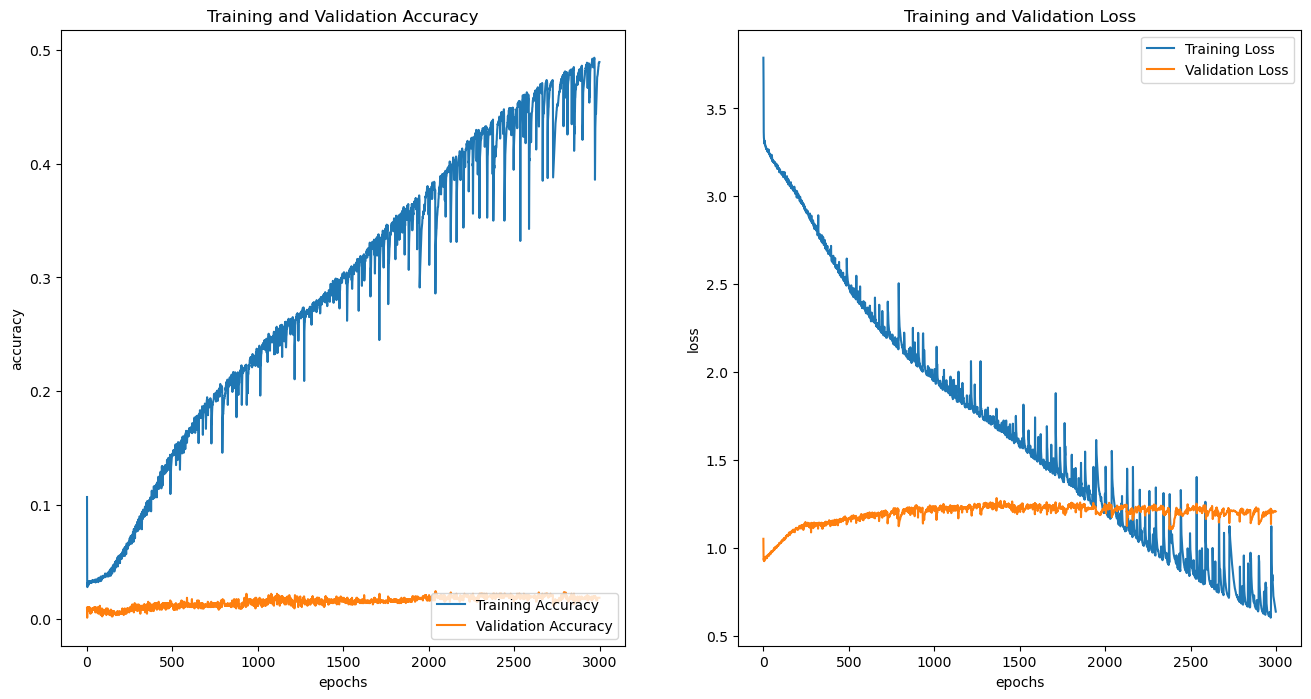

In [21]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## Predictions Model

In [22]:
from keras.models import load_model
training_model = load_model('training_model.h5py')
encoder_inputs = training_model.input[0]
encoder_outputs, state_h_enc, state_c_enc = training_model.layers[2].output
encoder_states = [state_h_enc, state_c_enc]
encoder_model = Model(encoder_inputs, encoder_states)

In [23]:
latent_dim = 256
decoder_state_input_hidden = Input(shape=(latent_dim,))
decoder_state_input_cell = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_hidden, decoder_state_input_cell]

In [24]:
decoder_outputs, state_hidden, state_cell = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_hidden, state_cell]
decoder_outputs = decoder_dense(decoder_outputs)

In [25]:
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

In [26]:
training_model = load_model('training_model.h5py')
encoder_inputs = training_model.input[0]
encoder_outputs, state_h_enc, state_c_enc = training_model.layers[2].output
encoder_states = [state_h_enc, state_c_enc]
encoder_model = Model(encoder_inputs, encoder_states)

latent_dim = 256
decoder_state_input_hidden = Input(shape=(latent_dim,))
decoder_state_input_cell = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_hidden, decoder_state_input_cell]
decoder_outputs, state_hidden, state_cell = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_hidden, state_cell]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

def decode_response(test_input):
    states_value = encoder_model.predict(test_input)
    
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    
    target_seq[0, 0, target_features_dict['<START>']] = 1.
    
    decoded_sentence = ''
    
    stop_condition = False
    while not stop_condition:
          output_tokens, hidden_state, cell_state = decoder_model.predict([target_seq] + states_value)
          
          sampled_token_index = np.argmax(output_tokens[0, -1, :])
          sampled_token = reverse_target_features_dict[sampled_token_index]
          decoded_sentence += " " + sampled_token
          
          if (sampled_token == '<END>' or len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

          target_seq = np.zeros((1, 1, num_decoder_tokens))
          target_seq[0, 0, sampled_token_index] = 1.
          
          states_value = [hidden_state, cell_state]
    return decoded_sentence

In [30]:
class ChatBot:
  negative_responses = ("no", "nope", "nah", "naw", "tidak", "nggak", "ngga", "ga", "gak", "maaf", "sorry")
  exit_commands = ("quit", "pause", "exit", "goodbye", "bye", "keluar", "stop", "selesai", "berhenti")
  
  def start_chat(self):
    user_response = input("\nHaloo, aku chatbot pintar!\n")
    
    if user_response in self.negative_responses:
      print("Ok, bubayy lop u!")
      return
    self.chat(user_response)
  
  def chat(self, reply):
    while not self.make_exit(reply):
      reply = input(self.generate_response(reply)+"\n")
    
  def string_to_matrix(self, user_input):
    tokens = re.findall(r"[\w']+|[^\s\w]", user_input)
    user_input_matrix = np.zeros(
      (1, max_encoder_seq_length, num_encoder_tokens),
      dtype='float32')
    for timestep, token in enumerate(tokens):
      if token in input_features_dict:
        user_input_matrix[0, timestep, input_features_dict[token]] = 1.
    return user_input_matrix
  
  def generate_response(self, user_input):
    input_matrix = self.string_to_matrix(user_input)
    chatbot_response = decode_response(input_matrix)
    #Remove <START> and <END> tokens from chatbot_response
    chatbot_response = chatbot_response.replace("<START>",'')
    chatbot_response = chatbot_response.replace("<END>",'')
    return chatbot_response
  
  def make_exit(self, reply):
    for exit_command in self.exit_commands:
      if exit_command in reply:
        print("Ok, bubayy lop u!")
        return True
    return False
  
chatbot = ChatBot()

## Demo Pertanyaan

In [31]:
chatbot.start_chat()


Haloo, aku chatbot pintar!
apa yang dimaksut penyakit mental?
1/1 [==============================] - 0s 46ms/step
 diperkirakan bahwa penyakit mental mempengaruhi dari orang dewasa di amerika dan bahwa dari orang dewasa memiliki penyakit mental yang serius penyakit mental tidak membeda bedakan ini dapat mempengaruhi siapa pun terlepas
jika saya terlibat dalam pengobatan apa yang perlu saya ketahui?
1/1 [==============================] - 0s 49ms/step
 karena memulai perawatan adalah langkah besar bagi individu dan keluarga itu bisa sangat luar biasa penting untuk terlibat dan terlibat dalam proses perawatan sebanyak mungkin beberapa pertanyaan yang perlu anda jawab
ke mana saya bisa mencari terapi
1/1 [==============================] - 0s 31ms/step
 di mana anda mencari bantuan akan tergantung pada sifat masalah danatau gejala dan apa yang paling cocok untuk anda seringkali tempat terbaik untuk memulai adalah dengan berbicara dengan seseorang yang anda percayai
apa yang harus saya keta

1/1 [==============================] - 0s 33ms/step
 beberapa perusahaan farmasi menawarkan program bantuan resep kepada individu dan keluarga dengan kebutuhan keuangan sementara yang lain menawarkan kartu diskon obat khusus program program ini biasanya memerlukan persetujuan
quit
Ok, bubayy lop u!
